In [1]:
import pandas as pd
import numpy as np
import ast
import re

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import animation
from matplotlib.animation import PillowWriter
from matplotlib.patches import Ellipse, Circle
import seaborn as sns

pd.set_option('display.max_rows', 500)

from IPython.display import HTML

In [2]:
# read csv with these columns and datatypes
store = "../store/0/logs/"
regime = 0
tdf = pd.read_parquet(f'{store}training_{regime}.parquet')
edf = pd.read_parquet(f'{store}testing_{regime}.parquet')

# Now append regime 1 df to these
regime = 1
tdf = pd.concat([tdf, pd.read_parquet(f'{store}training_{regime}.parquet')])
edf = pd.concat([edf, pd.read_parquet(f'{store}testing_{regime}.parquet')])

### Performance

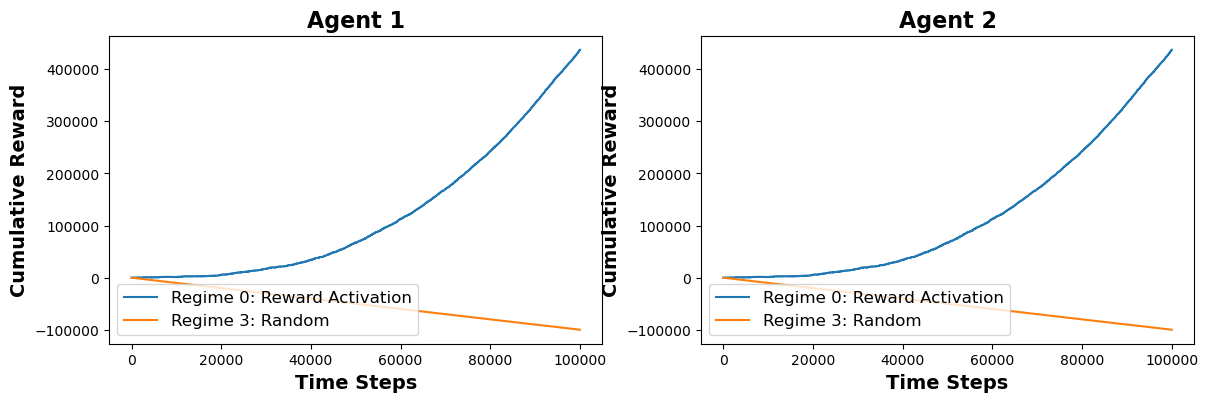

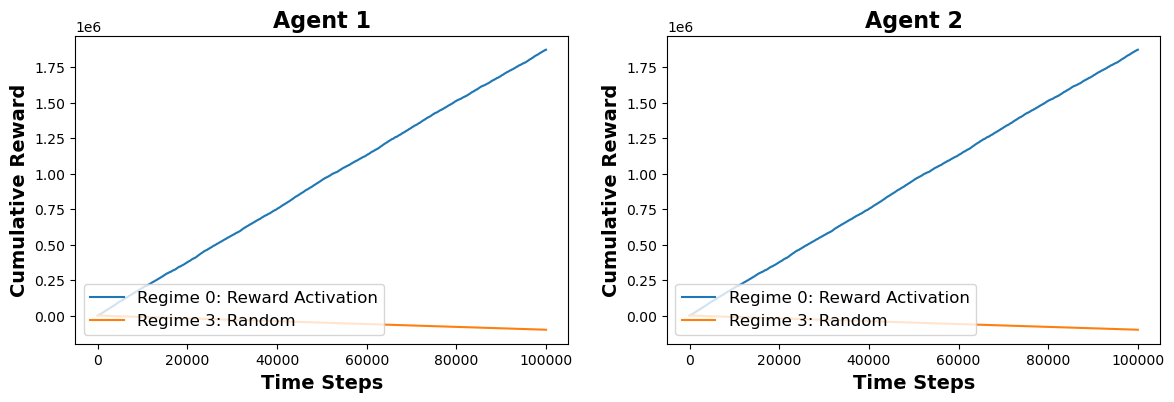

In [3]:
def plot_cumulative_rewards(df):
    # regime_names = ['Regime 0: Reward Activation', 'Regime 1: Left Right', 'Regime 2: Up Down', 'Regime 3: Random']
    regime_names = ['Regime 0: Reward Activation', 'Regime 3: Random']
    fig, ax = plt.subplots(1,2,figsize=(14, 4))
    # Loop through each regime and compute cumulative rewards
    for agent, ax in enumerate(ax.flatten()):
        for regime in df["regime_idx"].unique():
            df_regime = df[df["regime_idx"] == regime]
            crh = np.cumsum(df_regime["r1"])
            ax.plot(df_regime["frame_idx"], crh, label=regime_names[regime])

        ax.set_ylabel('Cumulative Reward', fontsize=14, fontweight='bold')
        ax.set_xlabel('Time Steps', fontsize=14, fontweight='bold')
        # ax.set_ylim(min(crh)+min(crh)*0.5, max(crh * 1.5))
        ax.legend(loc="lower left", fontsize=12)
        ax.set_title(f'Agent {agent + 1}', fontsize=16, fontweight='bold')
    plt.show()
plot_cumulative_rewards(tdf)
plot_cumulative_rewards(edf)

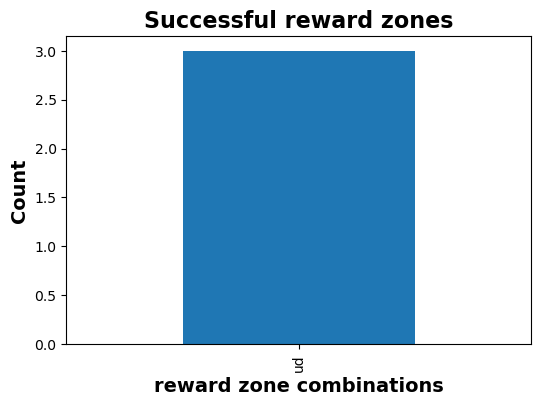

In [4]:
fig, ax = plt.subplots(figsize=(6, 4))
tdf[tdf['collected'] == True].reward_loc.value_counts().plot(kind='bar', ax=ax)
ax.set_xlabel("reward zone combinations", fontsize=14, fontweight='bold')
ax.set_ylabel("Count", fontsize=14, fontweight='bold')
ax.set_title("Successful reward zones", fontsize=16, fontweight='bold')
plt.show()

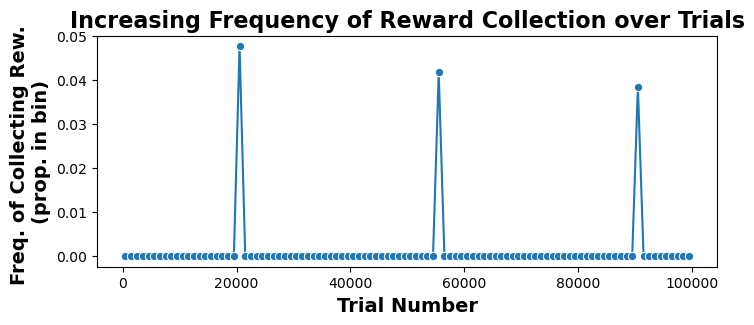

In [5]:
collection = tdf[(tdf.regime_idx == 1) & tdf.terminated].collected
num_bins = 100

collection_bin = pd.cut(collection.index, bins=num_bins)
df = pd.DataFrame({'bin': collection_bin, 'value': collection.values})
freq_df = df.groupby('bin', observed=True)['value'].mean().reset_index()
freq_df['bin_center'] = [interval.mid for interval in freq_df['bin']]

# Plot
plt.figure(figsize=(8, 3))
sns.lineplot(x=freq_df['bin_center'], y=freq_df['value'], marker='o')
plt.xlabel('Trial Number', fontsize=14, fontweight='bold')
plt.ylabel('Freq. of Collecting Rew. \n(prop. in bin)', fontsize=14, fontweight='bold')
plt.title('Increasing Frequency of Reward Collection over Trials', fontsize=16, fontweight='bold')
plt.show()

### Animation stepping

In [8]:
import sys
sys.path.append('/home/nuttidalab/Documents/rudra/MARLAX')

from marlax.utils import animate_simulation_by_df

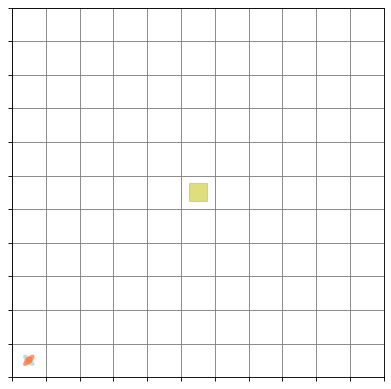

In [9]:
ani = animate_simulation_by_df(tdf, regime=1, start_frame=10_000_000-500, end_frame=10_000_000, grid_size=11, interval=200)
HTML(ani.to_jshtml())

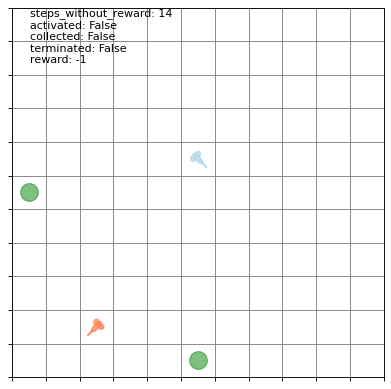

In [10]:
ani = animate_simulation_by_df(edf, regime=1, start_frame=0, end_frame=100, grid_size=11, interval=200)
HTML(ani.to_jshtml())

In [ ]:
# # Save as GIF
# gif_filename = "t.gif"
# ani.save(gif_filename, writer=PillowWriter(fps=3))

# print(f"Animation saved as {gif_filename}")